# **TITANIC SURVIVAL PREDICTION**

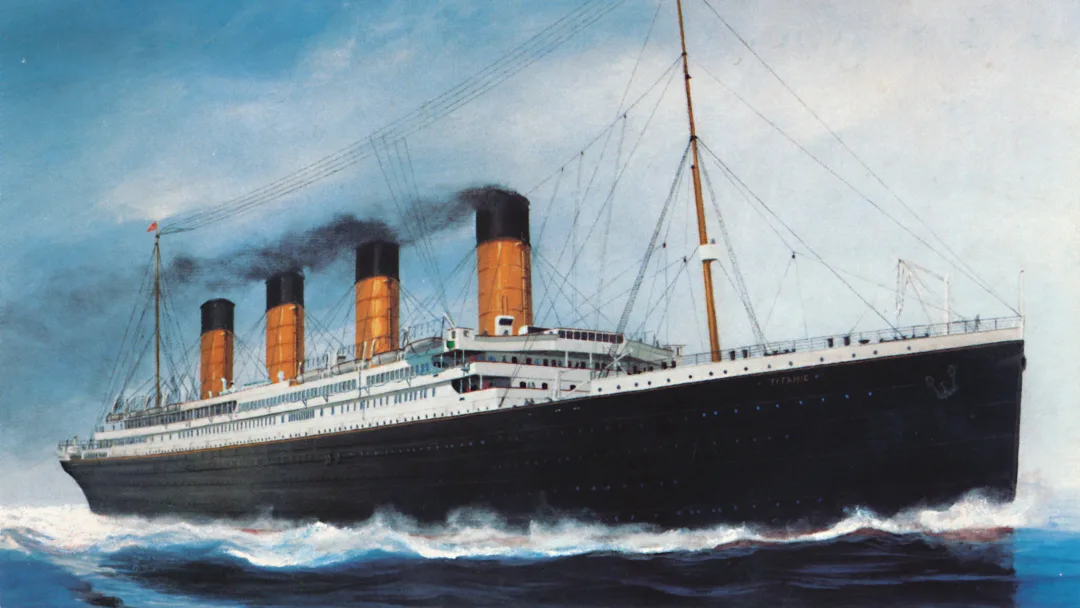

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.shape

(418, 12)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [10]:
# Dropping column Cabin because of missing values and dropping the Name and PassengerId columns.

df.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,A.5. 3236,8.0500,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,0,3,male,NaN,0,0,359309,8.0500,S


In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Text(0.5, 1.0, 'Survived Countplot')

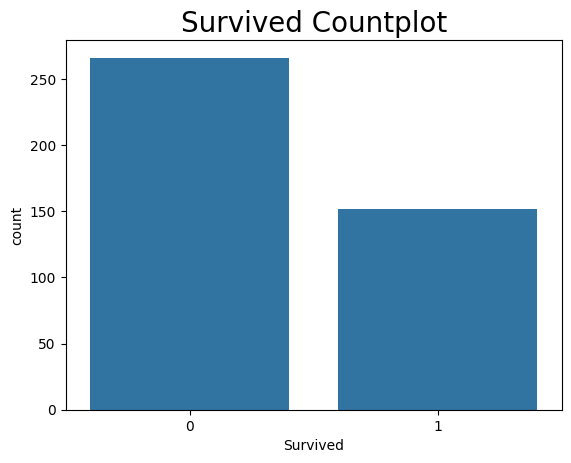

In [12]:
sns.countplot(x='Survived',data=df)
plt.title('Survived Countplot',color='black',size=20)

Text(0.5, 1.0, 'Pclass Count Plot')

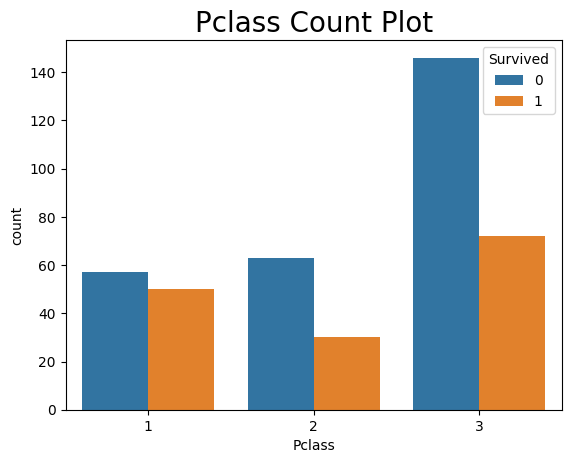

In [13]:
sns.countplot(x='Pclass',data=df,hue='Survived')
plt.title('Pclass Count Plot',color='black',size=20)

Text(0.5, 1.0, 'Sex Countplot')

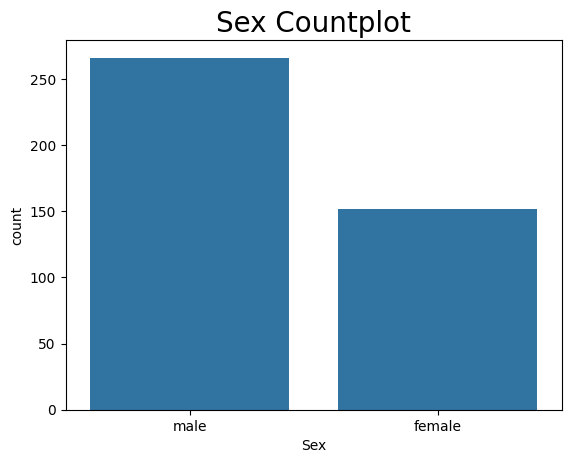

In [14]:
sns.countplot(x='Sex',data=df)
plt.title('Sex Countplot',color='black',size=20)

Text(0.5, 1.0, 'Parch Countplot')

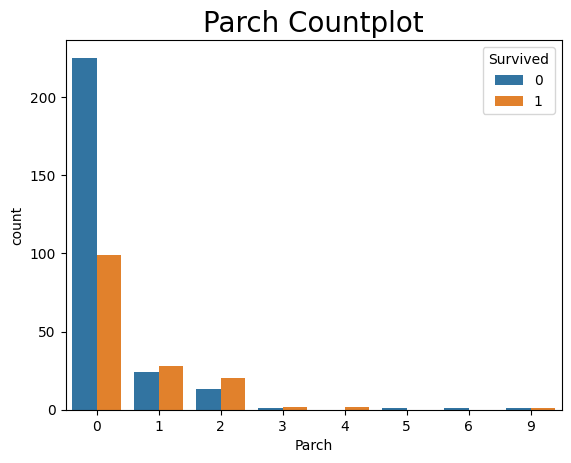

In [15]:
sns.countplot(x='Parch',data=df,hue='Survived')
plt.title('Parch Countplot',color='black',size=20)

Text(0.5, 1.0, 'Embarked Countplot')

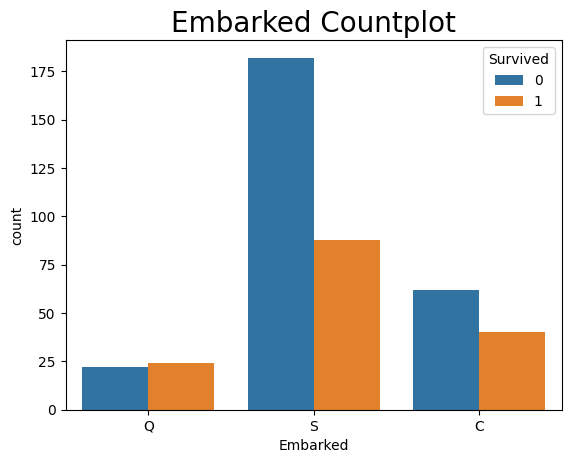

In [16]:
sns.countplot(x='Embarked',data=df,hue='Survived')
plt.title('Embarked Countplot',color='black',size=20)

<Axes: >

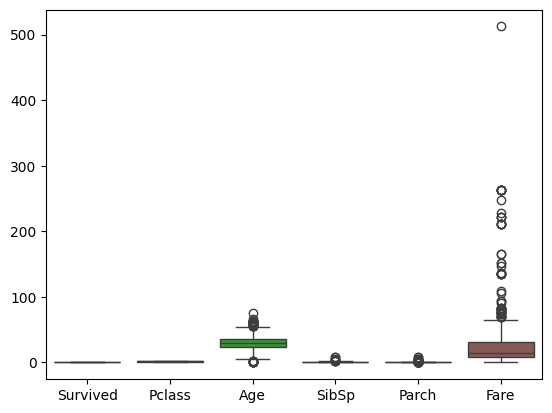

In [17]:
# Removing Outliers

sns.boxplot(data=df)

In [18]:
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[df[col].between(lower_bound,upper_bound)]
print(df)

     Survived  Pclass     Sex       Age  SibSp  Parch              Ticket  \
0           0       3    male  34.50000      0      0              330911   
1           1       3  female  47.00000      1      0              363272   
3           0       3    male  27.00000      0      0              315154   
5           0       3    male  14.00000      0      0                7538   
6           1       3  female  30.00000      0      0              330972   
..        ...     ...     ...       ...    ...    ...                 ...   
410         1       3  female  30.27259      0      0              365237   
412         1       3  female  28.00000      0      0              347086   
413         0       3    male  30.27259      0      0           A.5. 3236   
415         0       3    male  38.50000      0      0  SOTON/O.Q. 3101262   
416         0       3    male  30.27259      0      0              359309   

       Fare Embarked  
0    7.8292        Q  
1    7.0000        S  
3    8

<Axes: >

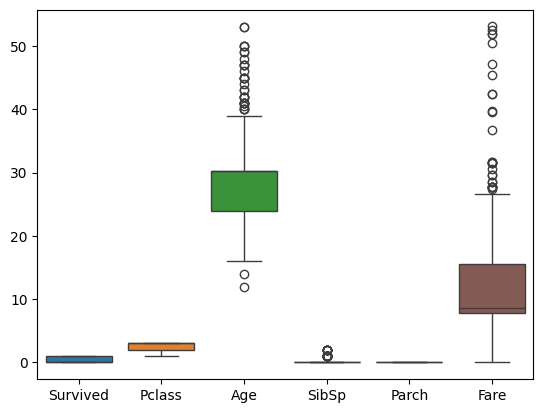

In [19]:
sns.boxplot(data=df)

In [20]:
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[df[col].between(lower_bound,upper_bound)]
print(df)

     Survived  Pclass     Sex       Age  SibSp  Parch              Ticket  \
0           0       3    male  34.50000      0      0              330911   
3           0       3    male  27.00000      0      0              315154   
6           1       3  female  30.00000      0      0              330972   
8           1       3  female  18.00000      0      0                2657   
10          0       3    male  30.27259      0      0              349220   
..        ...     ...     ...       ...    ...    ...                 ...   
410         1       3  female  30.27259      0      0              365237   
412         1       3  female  28.00000      0      0              347086   
413         0       3    male  30.27259      0      0           A.5. 3236   
415         0       3    male  38.50000      0      0  SOTON/O.Q. 3101262   
416         0       3    male  30.27259      0      0              359309   

       Fare Embarked  
0    7.8292        Q  
3    8.6625        S  
6    7

<Axes: >

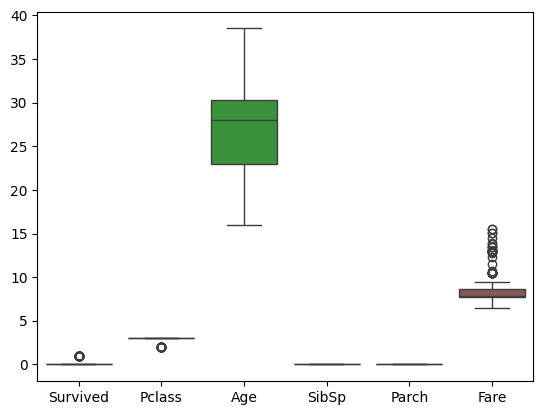

In [21]:
sns.boxplot(data=df)

In [22]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [23]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Sex']=lab.fit_transform(df['Sex'])
df['Ticket']=lab.fit_transform(df['Ticket'])
df['Embarked']=lab.fit_transform(df['Embarked'])

In [24]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Embarked      int64
dtype: object

In [25]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,0.141326,-1.000000,-0.077814,NaN,NaN,0.011284,-0.047879,-0.067730
Pclass,0.141326,1.000000,-0.141326,0.063525,NaN,NaN,0.151299,-0.853538,-0.056746
Sex,-1.000000,-0.141326,1.000000,0.077814,NaN,NaN,-0.011284,0.047879,0.067730
Age,-0.077814,0.063525,0.077814,1.000000,NaN,NaN,0.051063,0.006209,-0.109068
SibSp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket,0.011284,0.151299,-0.011284,0.051063,NaN,NaN,1.000000,-0.145072,0.202642
Fare,-0.047879,-0.853538,0.047879,0.006209,NaN,NaN,-0.145072,1.000000,0.062238
Embarked,-0.067730,-0.056746,0.067730,-0.109068,NaN,NaN,0.202642,0.062238,1.000000


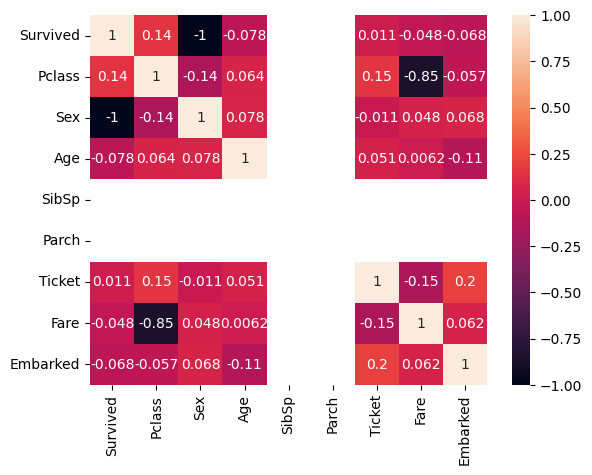

In [26]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
x=df[['Sex','Pclass','Age','SibSp','Parch','Ticket','Fare','Embarked']].values
x

array([[  1.        ,   3.        ,  34.5       , ...,  51.        ,
          7.8292    ,   1.        ],
       [  1.        ,   3.        ,  27.        , ...,  46.        ,
          8.6625    ,   2.        ],
       [  0.        ,   3.        ,  30.        , ...,  57.        ,
          7.6292    ,   1.        ],
       ...,
       [  1.        ,   3.        ,  30.27259036, ..., 137.        ,
          8.05      ,   2.        ],
       [  1.        ,   3.        ,  38.5       , ..., 160.        ,
          7.25      ,   2.        ],
       [  1.        ,   3.        ,  30.27259036, ..., 106.        ,
          8.05      ,   2.        ]])

In [28]:
y=df['Survived'].values
y

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [29]:
# Train-Test Spilt

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [30]:
# Normalization - MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
# Model - Decision Tree

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1])

[[33  0]
 [ 0 19]]
Accuracy score : 1.0
Precision : 1.0
Recall : 1.0


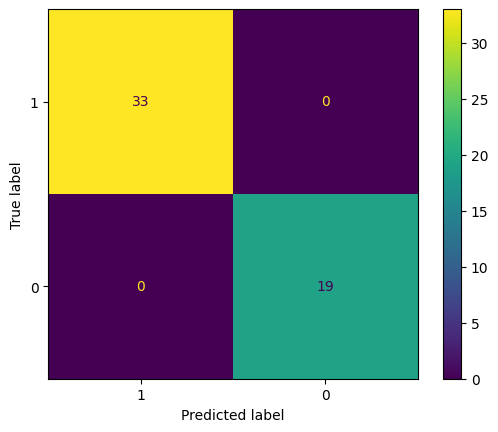

In [32]:
# Model Evaluation

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay
label=[1,0]
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()
print(mat)
print('Accuracy score :',accuracy_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))